# PROJECT 3: Assignment 5

###### Submitted By:
<table style="float:left">
    <tr>
        <th style="text-align:left"><b>Name</b></th> 
        <th style="text-align:center">Paras Kaushik</th>
    </tr>
    <tr>
        <th style="text-align:left"><b>Application Number</b></th> 
        <th style="text-align:center">4085303</th>
    </tr>
    <tr>
        <th style="text-align:left"><b>Acknowledge Number</b></th>
        <th style="text-align:center">3244</th>
    </tr>
    <tr>
        <th style="text-align:left"><b>Micronutrients</b></th>
        <th style="text-align:center">Vitamin: A, B, C, D, E, K</th>
    </tr>
</table>

<hr style="width:100%;height:2px;text-align:left;margin-left:0; background-color:black">

## Github Link


<hr style="width:100%;height:2px;text-align:left;margin-left:0; background-color:black">

## Objective

#### This program is utilized to extract symtoms associated with  Vitamin deficiency from pubmed database. Details of the methods are provided.

<hr style="width:100%;height:2px;text-align:left;margin-left:0; background-color:black">

## Functionality

### Call fetch_pubmed to extract artciles from pubmed database 
<b>fetch_pubmed (keyword, mindate, maxdate)</b>: This function is to fetch artciles from pubmed database.
<ul>
    <li>keyword: Keyword list as parameters. In example we've pass "Vitamin Deficiency" as parameter.</li>
    <li>mindate: mindate as parameters. Default is 2010.</li>
    <li>maxdate: maxdate as parameters. Default is 2020.</li>
</ul> 

<hr style="width:100%;height:2px;text-align:left;margin-left:0; background-color:black">

## Code

In [6]:
# Importing requests for programmatic access to databases through APIs
import requests

# Importing pandas for dataframe operations
import pandas as pd

# Library to parse xml response from pubmed
import xml.etree.ElementTree as ET

# Library to create wordcloud
from wordcloud import WordCloud

# Library to create graphical analysis
import matplotlib.pyplot as plt

# Initiating vizuals as a result in cell
%matplotlib inline

In [2]:
# Function to fetch article abstracts from pubmed with PMID
def fetch_pubmed(keyword, mindate = 2010, maxdate = 2020):
    
    # Initializing database name and API url
    db = 'pubmed'; # Declaring the variable for pubmed database
    base = 'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/'; # Initializing the base url for pubmed 
    
    ## Pubmed fetch pipeline
    # Pubmed - search util
    query = keyword.replace(' ','+')+'&mindate='+str(mindate)+'&maxdate='+str(maxdate); # Constructing search query for vitamins and time period
    url_search = base+'esearch.fcgi?db='+db+'&term='+query+'&usehistory=y&retmode=json'; # Constructing url for search query
    response_dict = requests.get(url_search).json() # Hitting the pubmed with serach util
    
    web = response_dict['esearchresult']['webenv'] # Extracting webenv for fetching articles
    key = response_dict['esearchresult']['querykey'] # Extracting queryKey for fetching articles
    count = response_dict['esearchresult']['count'] # Extracting count of total number of results
    restart=0 # initializing restart variable
    
    df = pd.DataFrame(columns = ['PMID', 'TITLE', 'YEAR','ABSTRACT']) # Create and empty dataframe to load the parsed data

    for x in range(0, int(count), 10000):
        
        url_fetch = base+'efetch.fcgi?db='+db+'&query_key='+key+'&WebEnv='+web+'&rettype=abstract&retmode=xml&retstart=retstart&retmax=10000';
        restart += 10000
        
        #url_fetch = base+'efetch.fcgi?db='+db+'&query_key='+key+'&WebEnv='+web+'&rettype=abstract&retmode=xml';

        response = requests.get(url_fetch) # fetch the response from URL
        re_xml = response.text # Read the response text

        # Parse the response
        tree = ET.ElementTree(ET.fromstring(re_xml)) # Parse the xml
        root = tree.getroot() # Find the root element of XML

        # loop over all the articles to fetch abstract
        for article in root.findall("PubmedArticle"):
            try:
                df = df.append({'PMID' : article.find(".//PMID").text,
                                'YEAR' : article.find(".//JournalIssue/PubDate/Year").text,
                                'TITLE': article.find(".//ArticleTitle").text,
                                'ABSTRACT' : article.find(".//AbstractText").text},
                                ignore_index = True)
            except:
                pass
    return df

In [3]:
# Call fetch_pubmed function to extract articles published with Vitamin Deficieny keyword between 2010 and 2020 (default timeline)
df = fetch_pubmed(keyword = 'Vitamin Deficiency symptoms')

In [7]:
df.shape

(16878, 4)

In [5]:
df.to_csv('Vitaming_Deficiency_symptoms.csv')

<hr style="width:100%;height:2px;text-align:left;margin-left:0; background-color:black">

### Data Pre-processing

<OL>
    <li> <b>Tokenization</b>: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.</li>
<li> <b>Shot words</b>: Words that have fewer than 3 characters are removed.</li>
<li> <b>Stopwords</b>: All Stopwords are removed.</li>
<li> <b>Lemmatization</b>: words in third person are changed to first person and verbs in past and future tenses are changed into present.</li>
<li> <b>Stemming</b>: Words are reduced to their root form.</li>
</OL>

In [8]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)

import nltk
nltk.download('wordnet')

C:\Users\paras.kaushik\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\paras.kaushik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
# function to perform lemmatize and stem preprocessing
def lemmatize_stemming(text):
    stemmer = SnowballStemmer('english')
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [10]:
# Testing the function
doc_sample = df[df.index == 12].values[0][3]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['Nitrous', 'oxide,', 'primarily', 'used', 'in', 'the', 'medical', 'field', 'and', 'in', 'the', 'food', 'industry,', 'can', 'cause', 'symptoms', 'of', 'euphoria', 'and', 'analgesia.', 'Recreational', 'use', 'of', 'nitrous', 'oxide', 'is', 'rising,', 'as', 'are', 'reports', 'of', 'its', 'adverse', 'effects,', 'including', 'neurologic', 'complaints', 'secondary', 'to', 'an', 'evoked', 'vitamin', 'B12', 'deficiency.', 'We', 'outline', 'a', 'case', 'of', 'a', 'patient', 'presenting', 'with', 'several', 'neurologic', 'symptoms', 'and', 'found', 'to', 'have', 'myelopathy', 'secondary', 'to', 'vitamin', 'B12', 'deficiency', 'in', 'the', 'presence', 'of', 'prolonged', 'recreational', 'nitrous', 'oxide', 'use.']


 tokenized and lemmatized document: 
['nitrous', 'oxid', 'primarili', 'medic', 'field', 'food', 'industri', 'caus', 'symptom', 'euphoria', 'analgesia', 'recreat', 'nitrous', 'oxid', 'rise', 'report', 'advers', 'effect', 'includ', 'neurolog', 'complaint', 'secondari

In [12]:
# Preprocess the headline text, saving the results as ‘processed_docs’

df['ABSTRACT'] = df['ABSTRACT'].fillna('NA')
processed_docs = df['ABSTRACT'].map(preprocess)
processed_docs[:10]

0    [previous, studi, link, rheumatoid, arthriti, ...
1    [vitamin, defici, associ, depress, symptom, re...
2    [isol, central, posit, vertigo, cerebellar, in...
3    [pregnanc, bariatr, surgeri, usual, consid, sa...
4    [reductas, mthfr, defici, autosom, recess, dis...
5    [immun, modul, vitamin, implic, coronavirus, d...
6    [sole, measur, plasma, vitamin, longer, identi...
7    [neurolog, complic, bariatr, surgeri, rare, dr...
8    [distinguish, primari, phpt, famili, hypocalci...
9    [introduct, celiac, diseas, autoimmun, diseas,...
Name: ABSTRACT, dtype: object

In [14]:
processed_docs.to_csv('symtoms_words.csv')

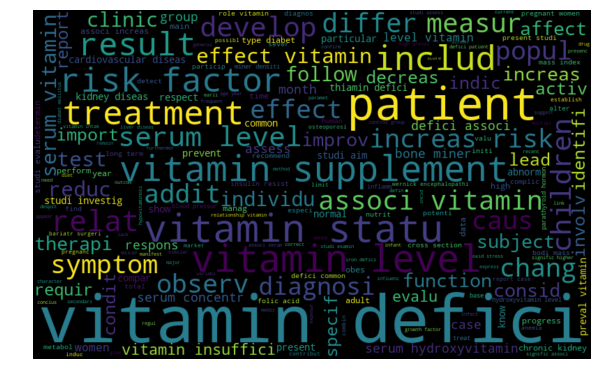

In [13]:
all_words = ' '.join([' '.join(article) for article in processed_docs])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()